# Consistence Test, Messier Objects

We calculated the age of several messier objects

In [3]:
import numpy as np
from astropy.table import Table, join

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
filepath = '../resources/ages_messier.tsv'
data = Table.read(filepath, format='ascii.commented_header', delimiter='\t')
data['sn id'] = data['sn id'].astype(int)    # Convert SN ID from float
data.sort('sn id')

In [42]:
data

sn id,age,lower limit,upper limit
int64,float64,float64,float64
63,6.28074771445,6.02648761175,7.24205406908
82,3.50278263495,3.20737262624,13.1420509823
87,12.7857099925,1.63309803945,13.0409688513
89,10.9795521131,6.88141804742,11.1618698551
91,3.39303393465,1.75807984457,13.0852480651
101,8.10320919234,5.7960144099,9.15916798279
105,11.6143810043,11.1645777714,11.8945831169
108,12.1088345808,4.38311001279,12.4704216601


In [30]:
data[0]['upper limit'] - data[0]['age']
data[0]['age'] - data[0]['lower limit']

3.3791952335237614

In [38]:
spiral = [63, 91, 101]
elliptical = [87, 89, 105]
starburst = [82, 108]

spi_ID = [0, 4, 5]
ell_ID = [2, 3, 6]
sta_ID = [1, 7]

In [16]:
data[spi_ID]
data['age'][spi_ID]

6.29792676867
9.17520964342


In [10]:
sns.set_style("whitegrid")

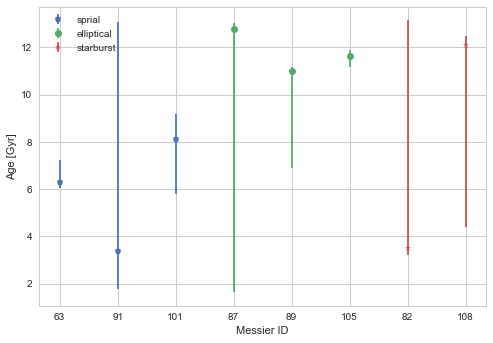

In [47]:
plt.figure('messier')
plt.errorbar([0,1,2], data['age'][spi_ID],
             yerr=[data['age'][spi_ID] - data['lower limit'][spi_ID] , 
                   data['upper limit'][spi_ID] - data['age'][spi_ID]],
             fmt='p', label='sprial')
plt.errorbar([3,4,5], data['age'][ell_ID],
             yerr=[data['age'][ell_ID] - data['lower limit'][ell_ID] , 
                   data['upper limit'][ell_ID] - data['age'][ell_ID]],
             fmt='o', label='elliptical')
plt.errorbar([6,7], data['age'][sta_ID],
             yerr=[data['age'][sta_ID] - data['lower limit'][sta_ID] , 
                   data['upper limit'][sta_ID] - data['age'][sta_ID]],
             fmt='*', label='starburst')

plt.xlabel('Messier ID')
# no ide why I need the extra spacing
plt.axes().set_xticklabels([0]+spiral+elliptical+starburst)
plt.ylabel('Age [Gyr]')

plt.legend(loc=2)
plt.savefig('messierCalibration_temp.pdf')
plt.show()